In [4]:

import numpy as np
import matplotlib.pyplot as plt
# Import required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from PIL import Image
import numpy as np

from qiskit import transpile
from qiskit.visualization import array_to_latex
from qiskit_aer import Aer

# Use AerSimulator for the latest version
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


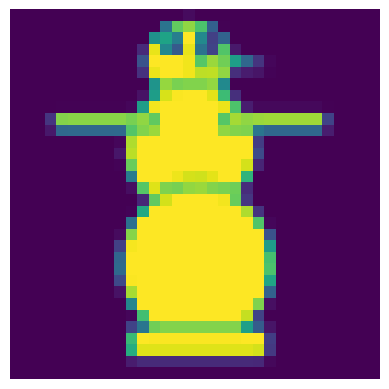

In [5]:

# Read the image
filename = 'snowman.png'
try:
    img = Image.open(filename).convert('L')
except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
    exit()

# Set number of qubits and calculate pixels per side
n_qubits = 10
n_pixels_per_side = 2 ** (n_qubits // 2)

# Resize the image
img = img.resize((n_pixels_per_side, n_pixels_per_side))
#im_resized = resize(im, (n_pixels_per_side, n_pixels_per_side), anti_aliasing=True)
img = np.array(img)
print(img)
# Display the resized image
plt.imshow(img)
plt.axis('off')  # Turn off axis for better visualization
plt.show()


In [4]:
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)


#we now normalize image and get coefficients in both horizontal and vertical directions

# Horizontal: Original image
h_norm_image = amplitude_encode(img)
print("Horizontal image normalized coefficients",h_norm_image)


print()
print()

# Vertical: Transpose of Original image
v_norm_image = amplitude_encode(img.T)
print("vertical image normalized coefficients",v_norm_image)

print()
print("size of 1d array",h_norm_image.shape)
print("size of 1d array",v_norm_image.shape)

Horizontal image normalized coefficients [0. 0. 0. ... 0. 0. 0.]


vertical image normalized coefficients [0. 0. 0. ... 0. 0. 0.]

size of 1d array (1024,)
size of 1d array (1024,)


In [5]:
data_q =n_qubits
ancillary_q = 1
total_q = data_q + ancillary_q

# Initialize the amplitude permutation unitary
Amp_permutation_unitary = np.identity(2**total_q)
print(Amp_permutation_unitary)
Amp_permutation_unitary=np.roll(Amp_permutation_unitary,1,axis=1)
print()
print()
print()
print("shift Amplitude permutation matrix by 1 unit to the right column wise")
print()
print(Amp_permutation_unitary)
print()
print("we will later use this for while applying hadamard operation to image coefficient vectors")
print()
print(Amp_permutation_unitary.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]



shift Amplitude permutation matrix by 1 unit to the right column wise

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]

we will later use this for while applying hadamard operation to image coefficient vectors

(2048, 2048)


In [8]:
h_norm_image /= np.linalg.norm(h_norm_image)
v_norm_image /= np.linalg.norm(v_norm_image)
qc_h = QuantumCircuit(total_q)
qc_h.initialize(h_norm_image, range(1, total_q))
qc_h.h(0)
qc_h.unitary(Amp_permutation_unitary, range(total_q))
qc_h.h(0)

display(qc_h.draw())


# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_q)
qc_v.initialize(v_norm_image, range(1, total_q))
qc_v.h(0)
qc_v.unitary(Amp_permutation_unitary, range(total_q))
qc_v.h(0)

display(qc_v.draw())

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

»
 q_0: »
      »
 q_1: »
      »
 q_2: »
      »
 q_3: »
      »
 q_4: »
      »
 q_5: »
      »
 q_6: »
      »
 q_7: »
      »
 q_8: »
      »
 q_9: »
      »
q_10: »
      »
«                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

»
 q_0: »
      »
 q_1: »
      »
 q_2: »
      »
 q_3: »
      »
 q_4: »
      »
 q_5: »
      »
 q_6: »
      »
 q_7: »
      »
 q_8: »
      »
 q_9: »
      »
q_10: »
      »
«                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [9]:


simulator = Aer.get_backend('statevector_simulator')

# Assuming `qc_h` and `qc_v` are your quantum circuits for horizontal and vertical scans

# Transpile the circuits for the simulator (optimizing the circuits)
circ_list = [qc_h, qc_v]
circ_list = [transpile(circ, simulator) for circ in circ_list]

# Execute the transpiled circuits on the simulator to get the statevectors
# Use the 'statevector_simulator' for statevector output
results = simulator.run(circ_list).result()

# Retrieve the statevectors for both circuits
state_vector_h = results.get_statevector(circ_list[0])
state_vector_v = results.get_statevector(circ_list[1])

# Print the size of the statevector
print("Size of statevector for horizontal scan:", state_vector_h.size)
print("Size of statevector for vertical scan:", state_vector_v.size)

# Visualize the statevectors (latex representation)
print('Horizontal scan statevector:')
display(array_to_latex(state_vector_h, max_size=2048))

print('Vertical scan statevector:')
display(array_to_latex(state_vector_v, max_size=2048))


C:\Users\ANWAR\AppData\Local\Temp\ipykernel_18044\2412998421.py:18: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print("Size of statevector for horizontal scan:", state_vector_h.size)
C:\Users\ANWAR\AppData\Local\Temp\ipykernel_18044\2412998421.py:19: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  print("Size of statevector for vertical scan:", state_vector_v.

Size of statevector for horizontal scan: 2048
Size of statevector for vertical scan: 2048
Horizontal scan statevector:


<IPython.core.display.Latex object>

Vertical scan statevector:


<IPython.core.display.Latex object>

In [10]:
#  postprocessing for plotting the output (Classical)

# Defining a lambda function for thresholding to binary values
# returns true for specified Amplitude values else false
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
h_edge_scan_img = np.abs(np.array([1 if threshold(state_vector_h[(2*i)+1].real) else 0 for i in range(2**data_q)])).reshape(32, 32)
v_edge_scan_img= np.abs(np.array([1 if threshold(state_vector_v[(2*i)+1].real) else 0 for i in range(2**data_q)])).reshape(32, 32).T



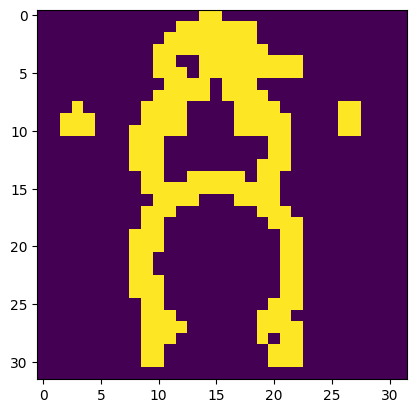

In [11]:
# Plotting the Horizontal
plt.imshow(h_edge_scan_img)


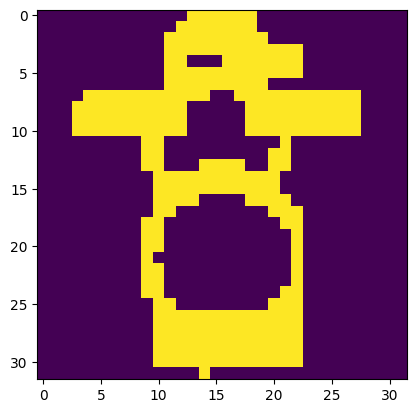

In [12]:
# Plotting the Vertical
plt.imshow(v_edge_scan_img)

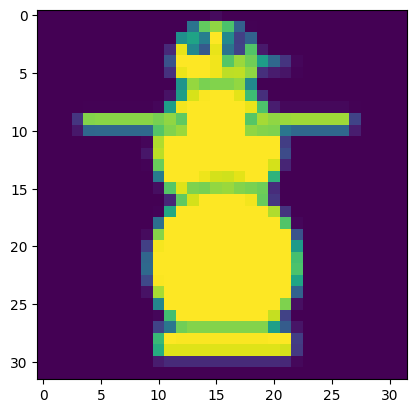

In [13]:


# Plotting the original and edge-detected images
plt.imshow(img)


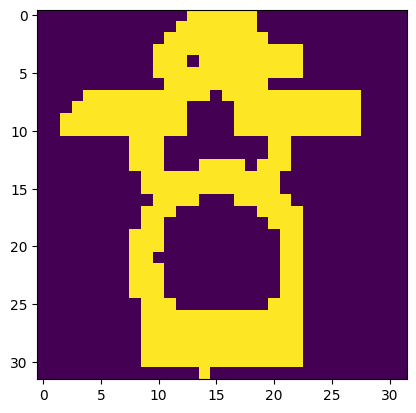

In [14]:
# Combining the horizontal and vertical component of the result by or operator
edge_scan_image = h_edge_scan_img | v_edge_scan_img
plt.imshow(edge_scan_image)